<a href="https://colab.research.google.com/github/rakj01/PythonLibraries/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
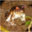

In [9]:
X_train[0]

In [11]:
calsses = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(calsses[y[index]])

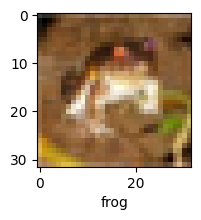

In [15]:
plot_sample(X_train, y_train, 0)

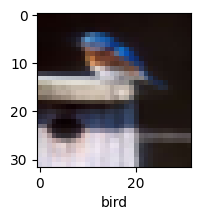

In [17]:
plot_sample(X_train, y_train, 13)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.3020 - loss: 1.9369
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.4197 - loss: 1.6459
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 94ms/step - accuracy: 0.4547 - loss: 1.5488
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 94ms/step - accuracy: 0.4781 - loss: 1.4878
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.4930 - loss: 1.4429


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      1000
           1       0.55      0.70      0.61      1000
           2       0.37      0.39      0.38      1000
           3       0.34      0.35      0.34      1000
           4       0.41      0.49      0.44      1000
           5       0.36      0.43      0.39      1000
           6       0.53      0.50      0.52      1000
           7       0.68      0.43      0.52      1000
           8       0.53      0.71      0.61      1000
           9       0.61      0.45      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3700 - loss: 1.7248
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.5944 - loss: 1.1569
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6453 - loss: 1.0141
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6792 - loss: 0.9211
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7019 - loss: 0.8563
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7214 - loss: 0.8044
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7406 - loss: 0.7473
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7592 - loss: 0.7042
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7719 - loss: 0.6605
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7772 - loss: 0.6366


In [25]:
cnn.evaluate(X_test,y_test )

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7051 - loss: 0.8957


[0.9155095815658569, 0.6973999738693237]

In [26]:
y_test = y_test.reshape(-1,)

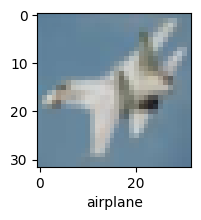

In [27]:
plot_sample(X_test, y_test, 10)

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


array([[4.6517098e-04, 2.6867987e-05, 2.6263294e-03, 8.4011209e-01,
        1.2569345e-04, 1.4117305e-01, 2.5502034e-03, 3.0629762e-05,
        1.2631111e-02, 2.5879638e-04],
       [4.7410166e-04, 1.4388724e-03, 7.1836183e-07, 4.4673487e-07,
        1.6380326e-08, 3.1548563e-08, 2.9701416e-08, 2.7664637e-09,
        9.9644929e-01, 1.6363849e-03],
       [1.5564929e-01, 2.1323650e-01, 4.6496689e-03, 6.0505425e-03,
        2.7093487e-05, 6.3531590e-04, 5.1356629e-03, 5.0326501e-04,
        4.5612454e-01, 1.5798791e-01],
       [9.7040772e-01, 6.9678673e-03, 1.0808545e-02, 3.1228678e-04,
        4.6300613e-03, 5.9628153e-05, 1.5345778e-03, 2.9990553e-05,
        5.1798774e-03, 6.9552400e-05],
       [9.2312530e-07, 6.9957919e-06, 4.4611595e-03, 4.4137944e-02,
        6.0980719e-01, 8.9661069e-03, 3.3259830e-01, 1.2725657e-05,
        8.5445472e-06, 5.4163372e-08]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)